In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('imdb_movies.csv')
df.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [3]:
df.columns


Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [4]:
#data filtering
d1=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,60,61]] #slicing the columns as per requirement
print(d1.columns)
print(len(d1.columns))


Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime',
       'content_rating', 'Country'],
      dtype='object')
18


In [5]:
d1.columns


Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime',
       'content_rating', 'Country'],
      dtype='object')

In [5]:
#Data Manipulations
d1['budget_in_millions']=d1['budget']/1000000 #converting large values into smaller
d1['gross_in_millions']=d1['Gross']/1000000

d1['profit']=d1['gross_in_millions']-d1['budget_in_millions'] #profit 


In [8]:
#For genre-1
a1=d1['genre_1'].value_counts()
a1=a1[a1>1]
a1


genre_1
Action       27
Drama        18
Biography    13
Adventure    12
Animation    11
Comedy        9
Crime         9
Name: count, dtype: int64

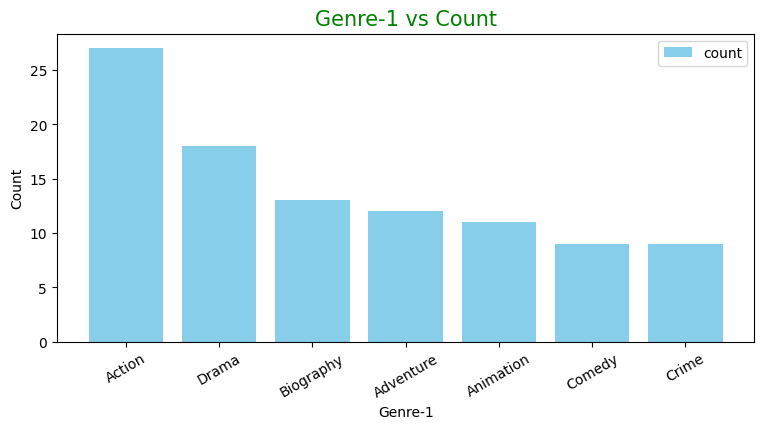

In [12]:
# For plotting a line chart between
plt.figure(figsize=(9,4))
plt.bar(a1.index,a1.values,color='skyblue',label='count')
plt.xlabel('Genre-1')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend()
plt.title('Genre-1 vs Count',fontsize=15,color='green')
plt.show()


In [15]:
#For genre-2
a2=d1['genre_2'].value_counts()
a2=a2[a2>1]

#For genre-3
a3=d1['genre_3'].value_counts()
a3=a3[a3>1]


In [37]:
#filtering conditions
b1=d1.groupby('title_year')['gross_in_millions'].mean().reset_index() 
b1.sort_values(by='title_year',ascending=True)
b1


,title_year,gross_in_millions
0,2010,144.491757
1,2011,84.540662
2,2012,196.332834
3,2013,107.792931
4,2014,134.183003
5,2015,197.108278
6,2016,191.357975


In [38]:
b2=d1.groupby('title_year')[['budget_in_millions','profit']].mean().reset_index() 
b2.sort_values(by='title_year',ascending=True)
b2


,title_year,budget_in_millions,profit
0,2010,76.611111,67.880646
1,2011,60.727273,23.813389
2,2012,98.953846,97.378988
3,2013,60.588235,47.204695
4,2014,83.340000,50.843003
5,2015,89.600000,107.508278
6,2016,81.444444,109.913531


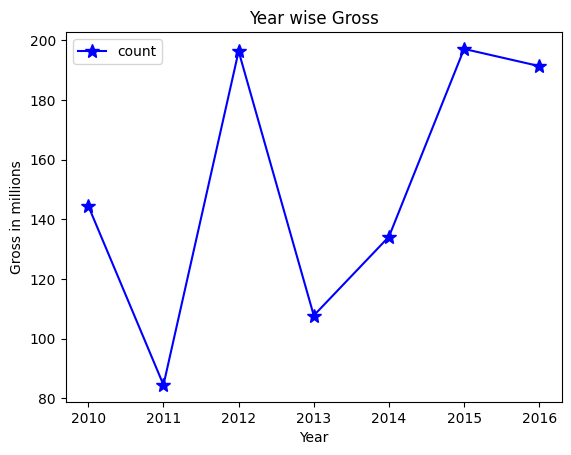

In [43]:
#Plotting the line chart for gross in Millions year-wise
plt.plot(b1['title_year'],b1['gross_in_millions'],color='blue',marker='*',markersize=10,label='count',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Gross in millions')
plt.legend()
plt.title('Year wise Gross')
plt.show()


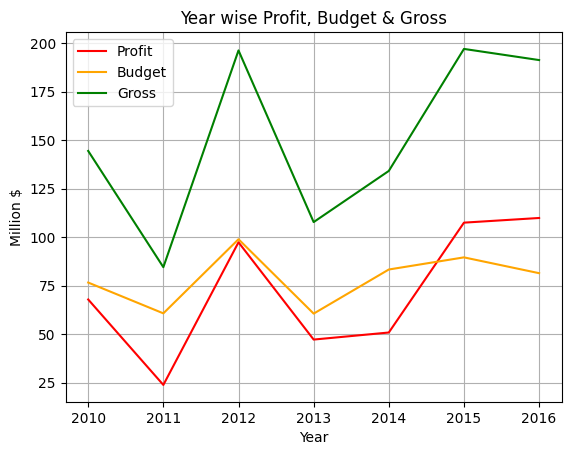

In [40]:
#Variations in Gross, Profit, Budget between 2010-2016
plt.plot(b2['title_year'],b2['profit'],color='red',label='Profit')
plt.plot(b2['title_year'],b2['budget_in_millions'],color='orange',label='Budget')
plt.plot(b1['title_year'],b1['gross_in_millions'],color='green',label='Gross')
plt.xlabel('Year')
plt.ylabel('Million $')
plt.legend()
plt.grid()
plt.title('Year wise Profit, Budget & Gross')
plt.show()


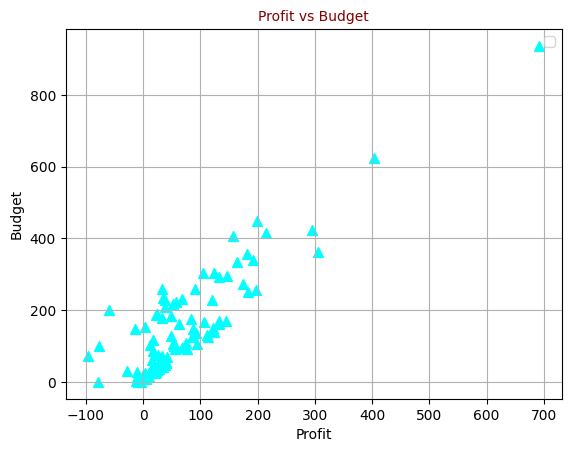

In [41]:
#scatter plot profit vs gross
plt.scatter(d1['profit'],d1['gross_in_millions'],marker='^',s=50,color='cyan')
plt.xlabel('Profit')
plt.ylabel('Budget')
plt.legend()
plt.title('Profit vs Budget',fontsize=10,color='maroon')
plt.grid()
plt.show()


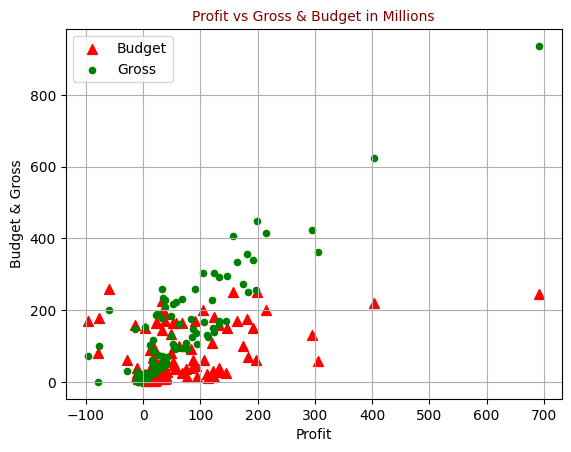

In [47]:
# corelation between profit vs gross & budget
plt.scatter(d1['profit'],d1['budget_in_millions'],marker='^',s=50,color='red',label='Budget')
plt.scatter(d1['profit'],d1['gross_in_millions'],marker='o',s=20,color='green',label='Gross')
plt.xlabel('Profit')
plt.ylabel('Budget & Gross')
plt.legend()
plt.title('Profit vs Gross & Budget in Millions',fontsize=10,color='maroon')
plt.grid()
plt.show()


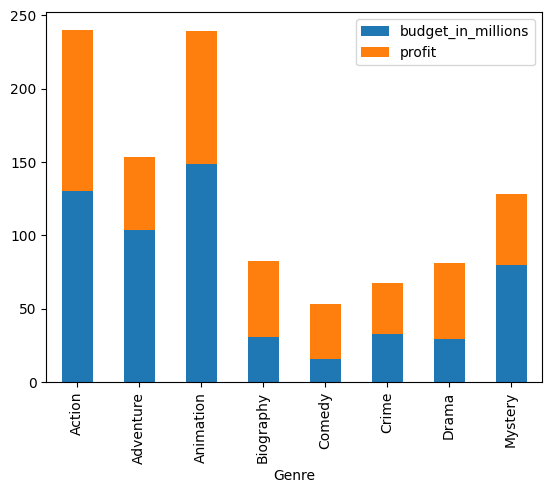

In [59]:
#stacked bar chart of Genre-2 as per Budget & profit

c1=d1.groupby('genre_1')[['budget_in_millions','profit']].mean() #filter
c1.index.names=['Genre']

#plotting
c1.plot(kind='bar',stacked=True)
plt.show()



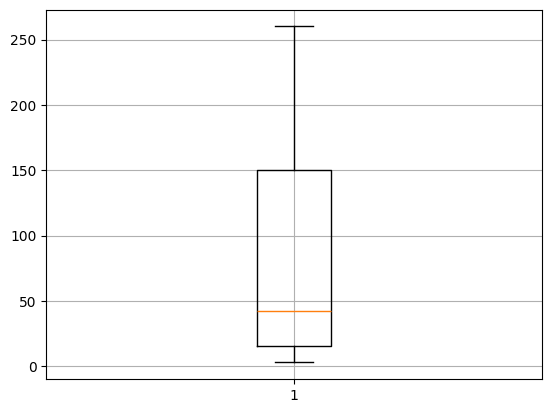

In [66]:
#boxplot of budget in millions
plt.boxplot(d1['budget_in_millions']) 
plt.grid()
plt.show()


In [65]:
d1['budget_in_millions'].describe()


count    100.000000
mean      78.384000
std       74.452947
min        3.000000
25%       15.750000
50%       42.250000
75%      150.000000
max      260.000000
Name: budget_in_millions, dtype: float64

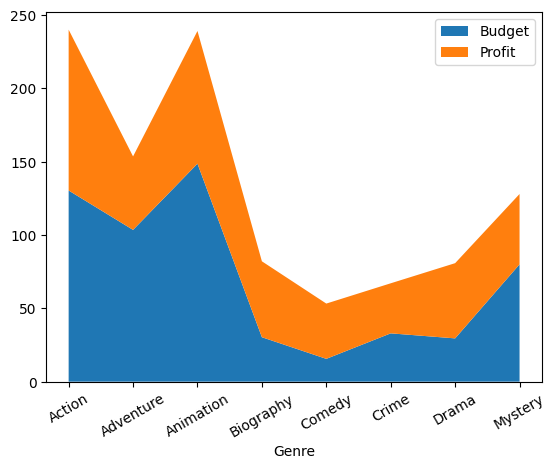

In [70]:
#plot the stack area chart for the above same
plt.stackplot(c1.index,c1['budget_in_millions'],c1['profit'],labels=['Budget','Profit'])
plt.xlabel('Genre')
plt.xticks(rotation=30)
plt.legend()
plt.show()


In [72]:
#for 3 different columns
#filter
c2=d1.groupby('genre_1')[['budget_in_millions','profit','gross_in_millions']].mean()
c2.index.names=['Genre']
c2


,budget_in_millions,profit,gross_in_millions
Genre,,,
Action,130.351852,109.681664,240.033516
Adventure,103.500000,50.094821,153.594821
Animation,148.654545,90.472442,239.126987
Biography,30.307692,51.766971,82.074664
Comedy,15.555556,37.693860,53.249416
Crime,32.944444,34.133466,67.077910
Drama,29.511111,51.292340,80.803451
Mystery,80.000000,47.968405,127.968405


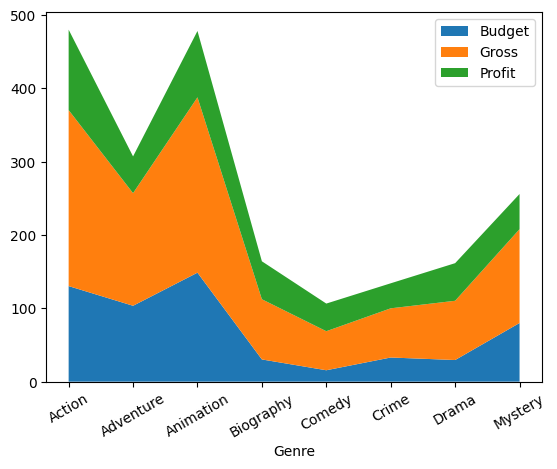

In [73]:
# plotting
plt.stackplot(c2.index,c2['budget_in_millions'],c2['gross_in_millions'],c2['profit'],labels=['Budget','Gross','Profit'])
plt.xlabel('Genre')
plt.xticks(rotation=30)
plt.legend()
plt.show()


In [6]:
#nultiple subplots
#filter
r1=d1.groupby('title_year').agg({'IMDb_rating':['sum'],'MetaCritic':['mean']})
r1


,IMDb_rating,MetaCritic
,sum,mean
title_year,,
2010,141.3,75.764706
2011,85.7,75.181818
2012,102.8,77.000000
2013,133.5,81.714286
2014,158.7,77.600000
2015,94.8,81.833333
2016,71.5,79.666667


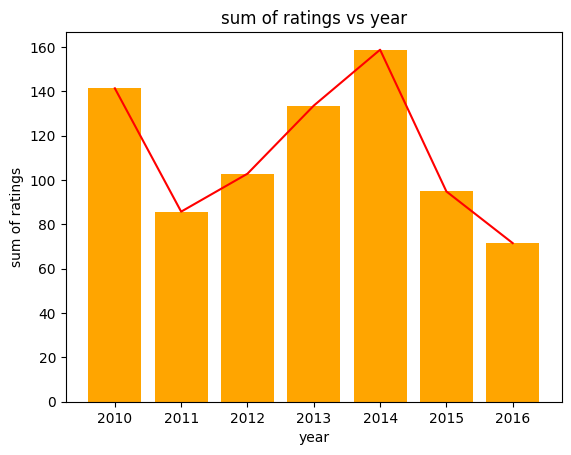

In [7]:
#multiple plots on a single chart as:
plt.bar(r1.index,r1[('IMDb_rating'),'sum'],color='orange')
plt.plot(r1.index,r1[('IMDb_rating'),'sum'],color='red')
plt.xlabel('year')
plt.ylabel('sum of ratings')
plt.title('sum of ratings vs year')
plt.show()


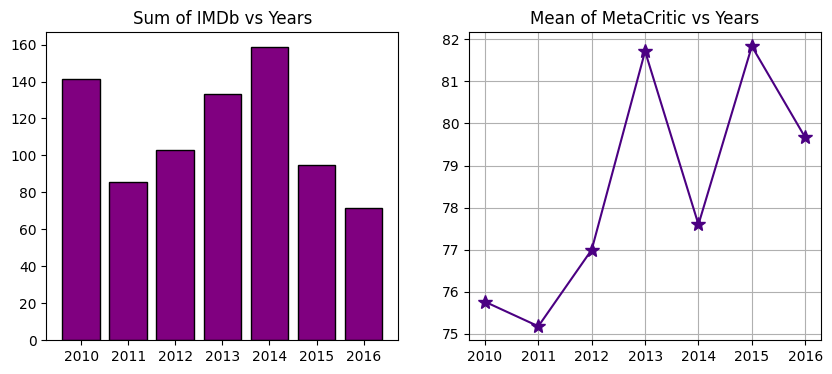

In [8]:
#plotting subplots in one chart
#sum of imdb ratings vs year
#mean of meta critic vs year
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

ax1.bar(r1.index,r1[('IMDb_rating','sum')],color='purple',edgecolor='black')
ax1.set_title('Sum of IMDb vs Years')

ax2.plot(r1.index,r1[('MetaCritic','mean')],color='indigo',marker='*',markersize=10)
ax2.set_title('Mean of MetaCritic vs Years')
ax2.grid()
plt.show()


In [10]:
r2=d1[['Title','budget_in_millions','profit','Runtime','content_rating', 'actor_1_name','IMDb_rating','genre_1']]
r2=r2.sort_values(by='profit',ascending=False).head(10)
r2


,Title,budget_in_millions,profit,Runtime,content_rating,actor_1_name,IMDb_rating,genre_1
97,Star Wars: Episode VII - The Force Awakens,245.0,691.662225,136,PG-13,Doug Walker,8.1,Action
11,The Avengers,220.0,403.279547,143,PG-13,Chris Hemsworth,8.1,Action
47,Deadpool,58.0,305.024263,108,R,Ryan Reynolds,8.0,Action
32,The Hunger Games: Catching Fire,130.0,294.645577,146,PG-13,Jennifer Lawrence,7.6,Action
12,Toy Story 3,200.0,214.984497,103,G,Tom Hanks,8.3,Animation
8,The Dark Knight Rises,250.0,198.130642,164,PG-13,Tom Hardy,8.4,Action
45,The Lego Movie,60.0,197.756197,100,PG,Morgan Freeman,7.8,Animation
1,Zootopia,150.0,191.268248,108,PG,Ginnifer Goodwin,8.1,Animation
41,Despicable Me,69.0,182.501645,124,PG,Steve Carell,7.7,Animation
18,Inside Out,175.0,181.454367,95,PG,Amy Poehler,8.2,Animation


In [11]:
#slicing the title values
r2['Title']=r2['Title'].str.slice(0,22)
r2


,Title,budget_in_millions,profit,Runtime,content_rating,actor_1_name,IMDb_rating,genre_1
97,Star Wars: Episode VII,245.0,691.662225,136,PG-13,Doug Walker,8.1,Action
11,The Avengers,220.0,403.279547,143,PG-13,Chris Hemsworth,8.1,Action
47,Deadpool,58.0,305.024263,108,R,Ryan Reynolds,8.0,Action
32,The Hunger Games: Catc,130.0,294.645577,146,PG-13,Jennifer Lawrence,7.6,Action
12,Toy Story 3,200.0,214.984497,103,G,Tom Hanks,8.3,Animation
8,The Dark Knight Rises,250.0,198.130642,164,PG-13,Tom Hardy,8.4,Action
45,The Lego Movie,60.0,197.756197,100,PG,Morgan Freeman,7.8,Animation
1,Zootopia,150.0,191.268248,108,PG,Ginnifer Goodwin,8.1,Animation
41,Despicable Me,69.0,182.501645,124,PG,Steve Carell,7.7,Animation
18,Inside Out,175.0,181.454367,95,PG,Amy Poehler,8.2,Animation


In [12]:
r3=r2.groupby(['content_rating'])['IMDb_rating'].mean()
r3


content_rating
G        8.30
PG       7.95
PG-13    8.05
R        8.00
Name: IMDb_rating, dtype: float64

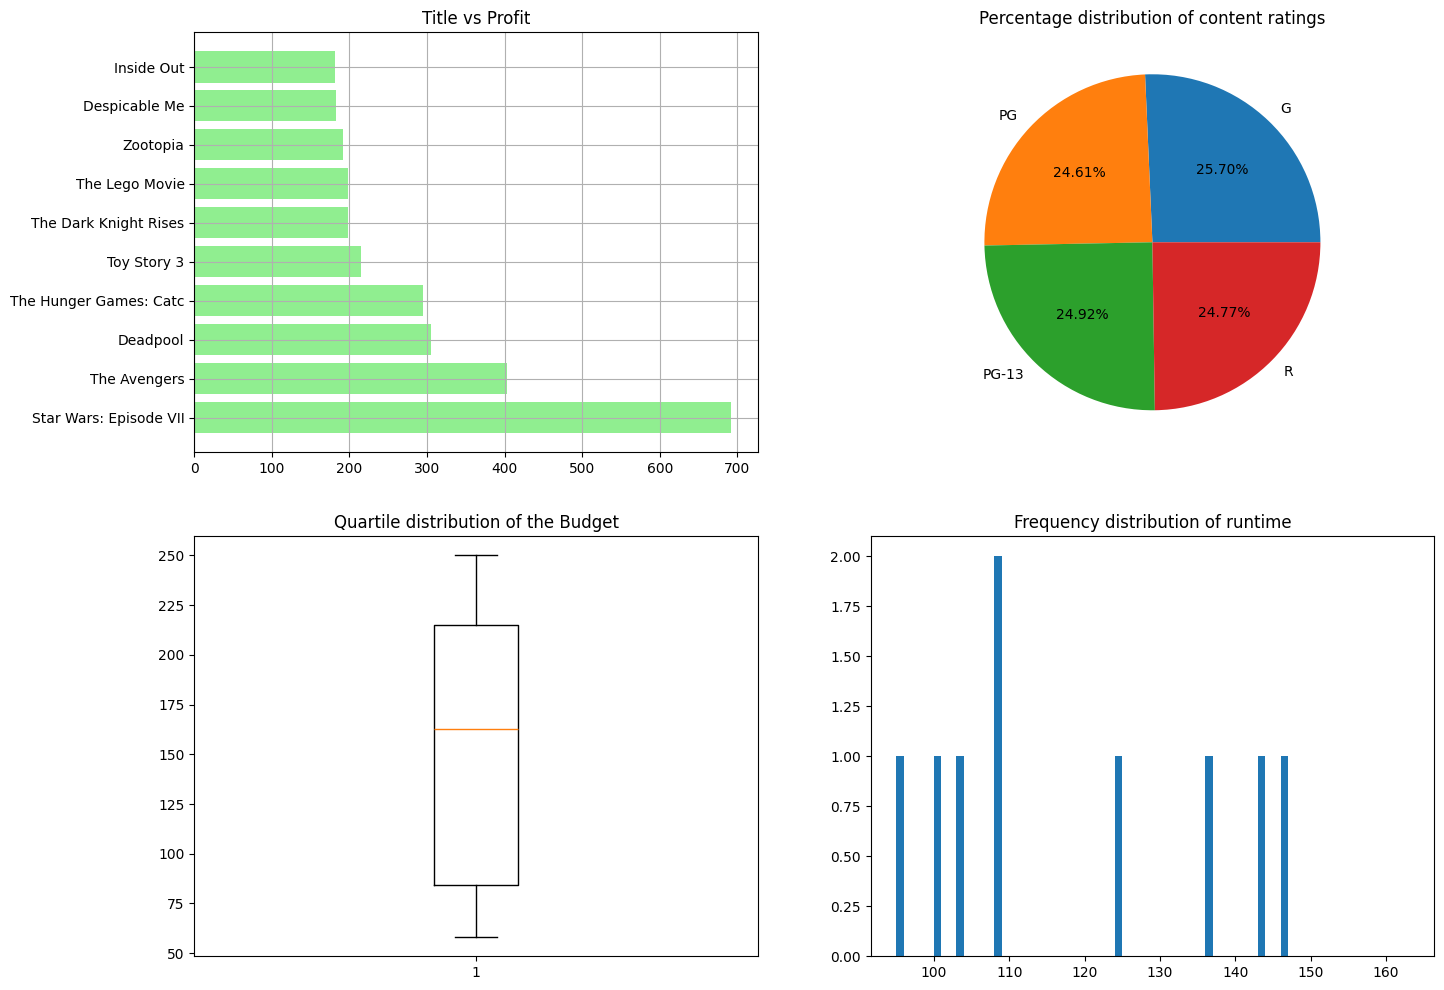

In [13]:
#Subplots 2x2 ie 4 subplots
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(16,12))

ax1.barh(r2['Title'],r2['profit'],color='lightgreen')
ax1.set_title('Title vs Profit')
ax1.grid()

ax2.pie(r3.values,labels=r3.index,autopct='%.2f%%')
ax2.set_title('Percentage distribution of content ratings')

ax3.boxplot(r2['budget_in_millions'])
ax3.set_title('Quartile distribution of the Budget')

ax4.hist(r2['Runtime'],bins=list(range(r2['Runtime'].min(),r2['Runtime'].max())))
ax4.set_title('Frequency distribution of runtime')

plt.show()


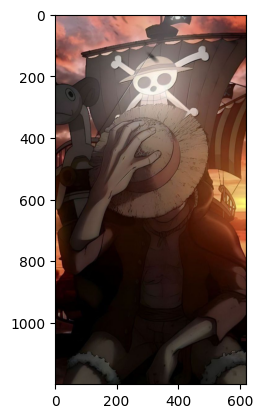

In [15]:
#to insert image

from PIL import Image

#display image in colored 
w1=Image.open('Winter Outfits.jpeg')
plt.imshow(w1)
plt.show()


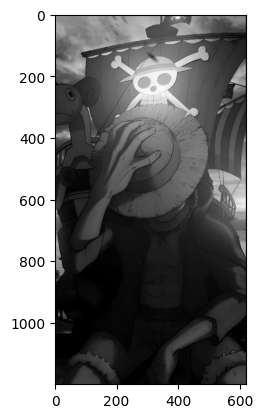

In [16]:
#display image in Black & White / Gray scale

w2=Image.open('Winter Outfits.jpeg')
gray_img=w2.convert("L") 

plt.imshow(gray_img, cmap='gray') 
plt.show()
